In [2]:
from io import BytesIO
import pandas as pd
import numpy as np
from rdkit.Chem import PandasTools

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors

from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults
rdDepictor.SetPreferCoordGen(True)

import mols2grid

DrawingOptions.bondLineWidth=1.8
IPythonConsole.ipython_useSVG=True
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.warning')
import rdkit
print(rdkit.__version__)

2022.09.5


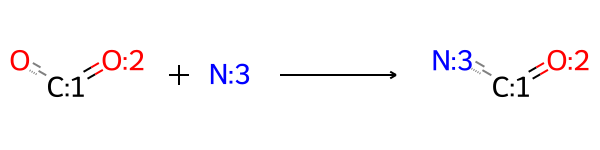

In [3]:
smarts = "[C:1](=[O:2])O.[Nh:3] >> [C:1](=[O:2])[Nh:3]"
rxn_amide = AllChem.ReactionFromSmarts(smarts)
rxn_amide

In [4]:
def amide_coupling(smile1, smile2):
    mol1 = Chem.MolFromSmiles(smile1)
    mol2 = Chem.MolFromSmiles(smile2)
    rxn_amide_smarts = "[C:1](=[O:2])O.[Nh:3] >> [C:1](=[O:2])[Nh:3]"
    rxn_amide = AllChem.ReactionFromSmarts (smarts)
    products = rxn_amide.RunReactants ([mol1, mol2])
    resulting_smile_list = []
    try:
        for i in range(len(products)):
            resulting_smile = Chem.MolToSmiles(products[i][0])
            resulting_smile_list.append(resulting_smile)
    except:
        pass
    return resulting_smile_list

In [5]:
def calc_desc(smiles):
    mol = Chem.MolFromSmiles(smiles)
    dummy = -9999.0
    res = [dummy, dummy, dummy, dummy, dummy,dummy]
    if mol:
        res = [Descriptors.MolWt(mol),Descriptors.MolLogP(mol),Descriptors.NumHDonors(mol),
               Descriptors.NumHAcceptors(mol),Descriptors.NumRotatableBonds(mol),Descriptors.TPSA(mol)]
    return res

In [6]:
cpd1 = ["c1ccccc1(C(=O)O)","c1ccncc1(C(=O)O)"]
cpd2 = ["CC(N)","NC1=CC=CC=C1"]

mols = []
for core in cpd1:
    for smi in cpd2:
        resulting_smiles = amide_coupling(core, smi)
        mols.append(amide_coupling(core, smi)[0])
mols = pd.DataFrame(mols,columns=['smiles'])#= [item for sublist in t for item in sublist]
mols2grid.display(mols, smiles_col="smiles",fixedBondLength=60,size=(200, 200),n_cols=5)

MolGridWidget()

In [7]:
# add to dataframe and calculate some props and label these
mol_df = pd.DataFrame(mols,columns=['smiles'])
t_ = mol_df.copy() 
t_['desc'] = t_.smiles.apply(calc_desc)
t_[["MW","LogP","HBD","HBA","Rot",'TPSA']] = t_.desc.to_list()
t_.drop("desc",axis=1,inplace=True)
mols2grid.display(t_, smiles_col="smiles",subset=['img','TPSA','LogP'],fixedBondLength=60,size=(200, 200),n_cols=5,
                 style={"TPSA": lambda x: "color: red" if x > 40 else ""})

MolGridWidget()